In [1]:
#First we import all the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

In [2]:
#Read the csv file
df = pd.read_csv('marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [4]:
#Extracting numerical column from dataframe

In [5]:
numerical = df.select_dtypes(np.number)
categorical = df.select_dtypes(object)

display (numerical.head())
display (categorical.head())

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [6]:
df.columns[df.isna().any()].tolist()


[]

In [7]:
df.describe() 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

<AxesSubplot:>

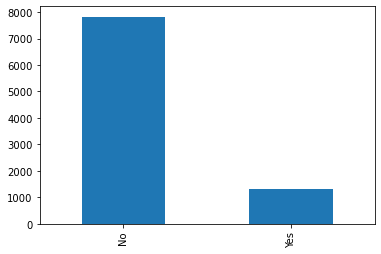

In [9]:
df['Response'].value_counts().plot (kind='bar')


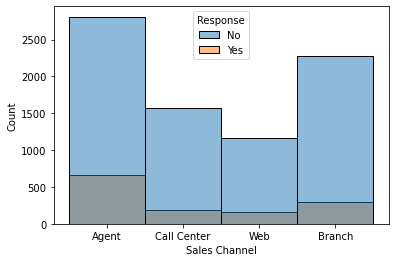

In [10]:
sns.histplot(x='Sales Channel', hue='Response', data=df)
plt.show()

In [11]:
print(df['Sales Channel'].value_counts())


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64


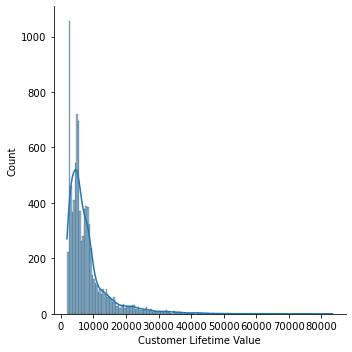

In [12]:
sns.displot(numerical['Customer Lifetime Value'], kde=True)


<AxesSubplot:xlabel='Total Claim Amount', ylabel='Response'>

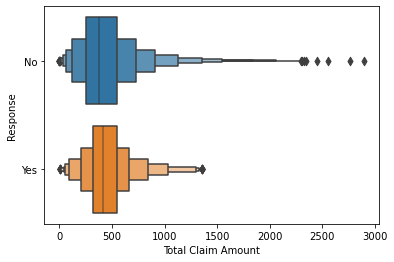

In [13]:
sns.boxenplot(data=df, x='Total Claim Amount', y='Response')

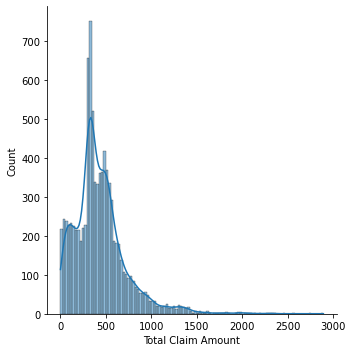

In [14]:
sns.displot(numerical['Total Claim Amount'], kde=True)


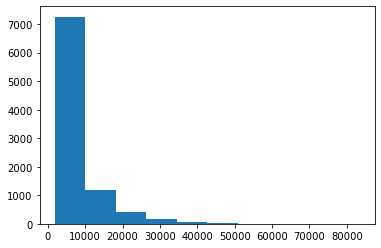

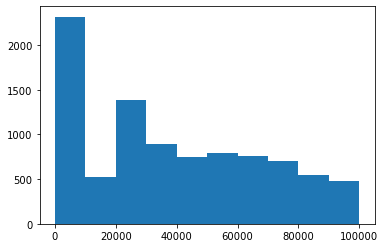

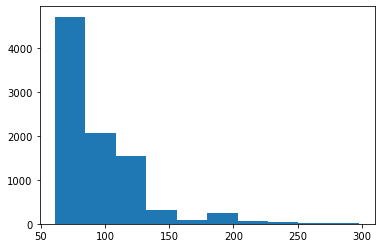

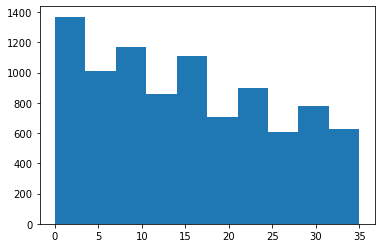

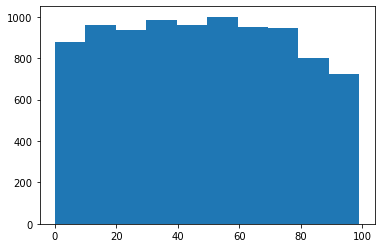

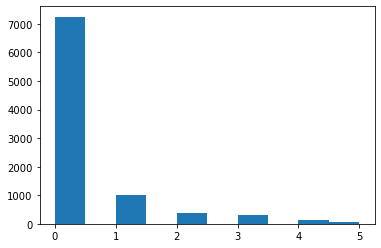

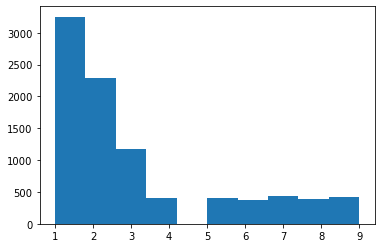

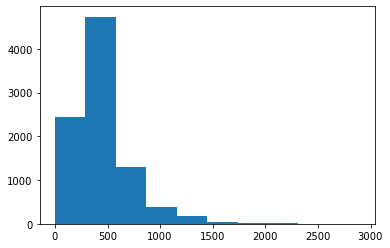

In [15]:
for column_name in numerical.columns:
    plt.hist(numerical[column_name])
    plt.show()

In [16]:
numerical=df.select_dtypes(include=[np.number])
numerical.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [17]:
numerical.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [18]:
correlations_matrix=numerical.corr()


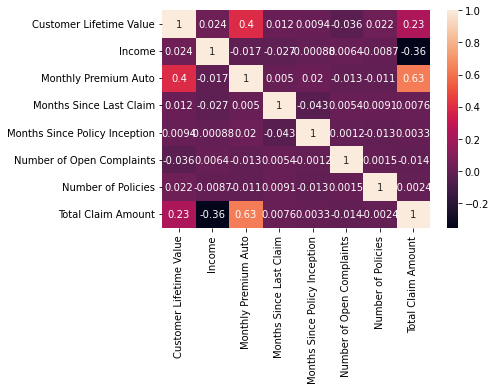

In [19]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()


In [20]:
# Split X into numerical and categorial columns
x = numerical[['Customer Lifetime Value','Income', 'Monthly Premium Auto', 'Number of Policies']]
y = numerical['Total Claim Amount']

In [21]:
encoder = OneHotEncoder(drop='first') 
encoder.fit(categorical)


OneHotEncoder(drop='first')

In [22]:
x_cat_encoded = encoder.transform(categorical).toarray()
cols = encoder.get_feature_names(input_features=categorical.columns)

/Users/clara/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
x_encoded_df = pd.DataFrame(x_cat_encoded, columns=cols)
x_encoded_df.head()

,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,Customer_AB13432,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
x_num = x.select_dtypes(include = np.number)
x_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Policies
0,2763.519279,56274,69,1
1,6979.535903,0,94,8
2,12887.431650,48767,108,2
3,7645.861827,0,106,7
4,2813.692575,43836,73,1
...,...,...,...,...
9129,23405.987980,71941,73,2
9130,3096.511217,21604,79,1
9131,8163.890428,0,85,2
9132,7524.442436,21941,96,3


In [25]:
#Normalization with minmax scaler

from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(x_num)
x_normalized = minMaxScaler.transform(x)
x_num = pd.DataFrame(x_normalized, columns=x.columns)
x_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Policies
0,0.010629,0.562847,0.033755,0.000
1,0.062406,0.000000,0.139241,0.875
2,0.134960,0.487763,0.198312,0.125
3,0.070589,0.000000,0.189873,0.750
4,0.011245,0.438443,0.050633,0.000
...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.125
9130,0.014719,0.216081,0.075949,0.000
9131,0.076951,0.000000,0.101266,0.125
9132,0.069098,0.219452,0.147679,0.250


In [26]:
#concatenating normalized numerical X and encoded categorical
x_final = pd.concat([x_encoded_df, x_num], axis=1)
x_final

,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,Customer_AB13432,...,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Policies
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.010629,0.562847,0.033755,0.000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.062406,0.000000,0.139241,0.875
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.134960,0.487763,0.198312,0.125
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.070589,0.000000,0.189873,0.750
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.011245,0.438443,0.050633,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.264137,0.719547,0.050633,0.125
9130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.014719,0.216081,0.075949,0.000
9131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.076951,0.000000,0.101266,0.125
9132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.069098,0.219452,0.147679,0.250


In [27]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(x_num)
x_normalized = minMaxScaler.transform(x_num)
x_num = pd.DataFrame(x_normalized, columns = x_num.columns)
x_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Policies
0,0.010629,0.562847,0.033755,0.000
1,0.062406,0.000000,0.139241,0.875
2,0.134960,0.487763,0.198312,0.125
3,0.070589,0.000000,0.189873,0.750
4,0.011245,0.438443,0.050633,0.000
...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.125
9130,0.014719,0.216081,0.075949,0.000
9131,0.076951,0.000000,0.101266,0.125
9132,0.069098,0.219452,0.147679,0.250


In [28]:
#Concate normalized numerical X and encoded categorical
x_final = pd.concat([x_encoded_df, x_num], axis=1)
x_final

,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,Customer_AB13432,...,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Policies
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.010629,0.562847,0.033755,0.000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.062406,0.000000,0.139241,0.875
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.134960,0.487763,0.198312,0.125
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.070589,0.000000,0.189873,0.750
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.011245,0.438443,0.050633,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.264137,0.719547,0.050633,0.125
9130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.014719,0.216081,0.075949,0.000
9131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.076951,0.000000,0.101266,0.125
9132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.069098,0.219452,0.147679,0.250


In [29]:
x_final


,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,Customer_AB13432,...,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Policies
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.010629,0.562847,0.033755,0.000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.062406,0.000000,0.139241,0.875
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.134960,0.487763,0.198312,0.125
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.070589,0.000000,0.189873,0.750
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.011245,0.438443,0.050633,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.264137,0.719547,0.050633,0.125
9130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.014719,0.216081,0.075949,0.000
9131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.076951,0.000000,0.101266,0.125
9132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.069098,0.219452,0.147679,0.250


In [30]:
#x_final.corr()

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def train_and_validate_model(x_final, y, test_size, random_state):
    
    x_train, x_test, y_train, y_test = train_test_split(x_final, y,
                                                        test_size=test_size,
                                                        random_state=random_state)
    print(f'X_train: {x_train.shape}')
    print(f'X_test:  {x_test.shape}')
    print(f'y_train: {y_train.shape}')
    print(f'y_test:  {y_test.shape}')


    lm = LinearRegression()
    lm.fit(x_train,y_train)
    
    y_pred_train = lm.predict(x_train)
    print(f"y_pred_train = {y_pred_train}")


    r2_train = r2_score(y_train, y_pred_train)
    print(f"r2_train     = {r2_train}")


    y_pred_test  = lm.predict(x_test)
    print(f"y_pred_test = {y_pred_test}")


    r2_test = r2_score(y_test, y_pred_test)
    print(f"r2_test     = {r2_test}")

 
    mse = mean_squared_error(y_test,y_pred_test)
    print(f'MSE = {mse}')

   
    rmse = np.sqrt(mse)
    print(f'RMSE = {rmse}')

  
    mae = mean_absolute_error(y_test, y_pred_test)
    print(f'MAE = {mae}')
    
    return y_pred_test, y_pred_train, y_train, y_test, lm

In [ ]:
y_pred_test, y_pred_train, y_train, y_test, model = train_and_validate_model(x_final, y, 0.3, 25)


X_train: (6393, 9238)
X_test:  (2741, 9238)
y_train: (6393,)
y_test:  (2741,)


In [ ]:
y_pred_test, y_pred_train, y_train, y_test, model = train_and_validate_model(x_num, y, 0.3, 25)


In [ ]:
def plot_results (y_train, y_pred_train, y_test, y_pred_test):
    fig, ax = plt.subplots(2,2, figsize=(10,10))
    ax[0,0].scatter(x=y_train, y=y_pred_train)
    ax[0,0].set_xlabel("OVA real")
    ax[0,0].set_ylabel("OVA predicted")
    ax[0,0].plot(y_train, y_train, color='black')
    ax[1,0].scatter(x=y_test, y=y_pred_test)
    ax[1,0].set_xlabel("OVA real")
    ax[1,0].set_ylabel("OVA predicted")
    ax[1,0].plot(y_test, y_test, color='black')
    ax[0,1].hist(y_train-y_pred_train, bins=30)
    ax[0,1].set_xlabel("Residuals")
    ax[1,1].hist(y_test-y_pred_test, bins=30)
    ax[1,1].set_xlabel("Residuals")
    plt.tight_layout()
    plt.show()

In [ ]:
print("final model")
plot_results(y_n_train,y_n_pred_train, y_n_test, y_n_pred_test)